In [92]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plate import Plate, QCPlate, SamplePlate
from study import Study

In [93]:
p = Plate(12)
print(p)

[    INFO] --- Created a 3x4 plate with 12 wells.


Plate ID: 1
Dimensions: 3 rows x 4 columns
Plate Layout (Well Names):
[['A1' 'A2' 'A3' 'A4']
 ['B1' 'B2' 'B3' 'B4']
 ['C1' 'C2' 'C3' 'C4']]


In [94]:
ps = SamplePlate()
ps.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.


,name,plate_id,coordinate,index,empty,rgb_color,sample_code,sample_name
0,A1,1,"(0, 0)",0,True,"(1, 1, 1)",S,Specimen
1,A2,1,"(0, 1)",1,True,"(1, 1, 1)",S,Specimen
2,A3,1,"(0, 2)",2,True,"(1, 1, 1)",S,Specimen
3,A4,1,"(0, 3)",3,True,"(1, 1, 1)",S,Specimen
4,A5,1,"(0, 4)",4,True,"(1, 1, 1)",S,Specimen
...,...,...,...,...,...,...,...,...
91,H8,1,"(7, 7)",91,True,"(1, 1, 1)",S,Specimen
92,H9,1,"(7, 8)",92,True,"(1, 1, 1)",S,Specimen
93,H10,1,"(7, 9)",93,True,"(1, 1, 1)",S,Specimen
94,H11,1,"(7, 10)",94,True,"(1, 1, 1)",S,Specimen


In [95]:
qc_sample_pattern = Path("../../data/plate_config_dynamic.toml")
qcp = QCPlate(QC_config=qc_sample_pattern)
qcp.as_dataframe()

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../../data/plate_config_dynamic.toml
[    INFO] --- Creating dynamic plate layout with QC samples.


,name,plate_id,coordinate,index,empty,rgb_color,QC,sample_code,sample_type,sample_name
0,A1,1,"(0, 0)",0,True,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC1
1,A2,1,"(0, 1)",1,True,"(1, 1, 1)",True,PB,PB: Paper_Blank,PB1
2,A3,1,"(0, 2)",2,True,"(1, 1, 1)",False,S,Specimen,S1
3,A4,1,"(0, 3)",3,True,"(1, 1, 1)",False,S,Specimen,S2
4,A5,1,"(0, 4)",4,True,"(1, 1, 1)",False,S,Specimen,S3
...,...,...,...,...,...,...,...,...,...,...
91,H8,1,"(7, 7)",91,True,"(1, 1, 1)",True,EC,EC: External_Control_(matrix),EC8
92,H9,1,"(7, 8)",92,True,"(1, 1, 1)",True,PO,PO: Pooled_specimens,PO4
93,H10,1,"(7, 9)",93,True,"(1, 1, 1)",False,S,Specimen,S1
94,H11,1,"(7, 10)",94,True,"(1, 1, 1)",False,S,Specimen,S2


In [96]:
fake_samples_csv_file = Path("../../data/fake_case_control_Npairs_523_Ngroups_5.csv")

samples_df = pd.read_csv(fake_samples_csv_file)

samples_df

,Unnamed: 0,pair_ID,specimen_ID,object,date_of_birth,barcode,organ
0,0,0,888,Control,1993-12-13,95388762,Parotid glands
1,1,0,889,Case,1993-12-13,66794295,Parotid glands
2,2,1,962,Control,2006-06-22,69215322,Tendons
3,3,1,963,Case,2006-06-22,77642424,Tendons
4,4,2,261,Control,1999-05-06,30225664,Parotid glands
...,...,...,...,...,...,...,...
1041,1041,520,66,Case,1991-08-29,772655,Mammary glands
1042,1042,521,558,Control,1993-03-21,49757491,Parotid glands
1043,1043,521,559,Case,1993-03-24,46022059,Parotid glands
1044,1044,522,710,Control,2002-03-23,73437017,Mammary glands


In [97]:
samples_df["organ"].value_counts(normalize=True)

organ
Mammary glands      0.216061
Descending colon    0.206501
Tendons             0.196941
Parotid glands      0.193117
Kidneys             0.187380
Name: proportion, dtype: float64

In [98]:
study = Study("fake_study")
study.load_sample_file(fake_samples_csv_file)
# df = study.specimen_records_df
# df = df.sort_values(by=["organ"])
# study.specimen_records_df = df
# df

[    INFO] --- Found group index in column pair_ID
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ


In [99]:

study.randomize_order(case_control=True, reproducible=False)
study.distribute_samples_to_plates(SamplePlate())


[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Distributed samples across 11 plates.


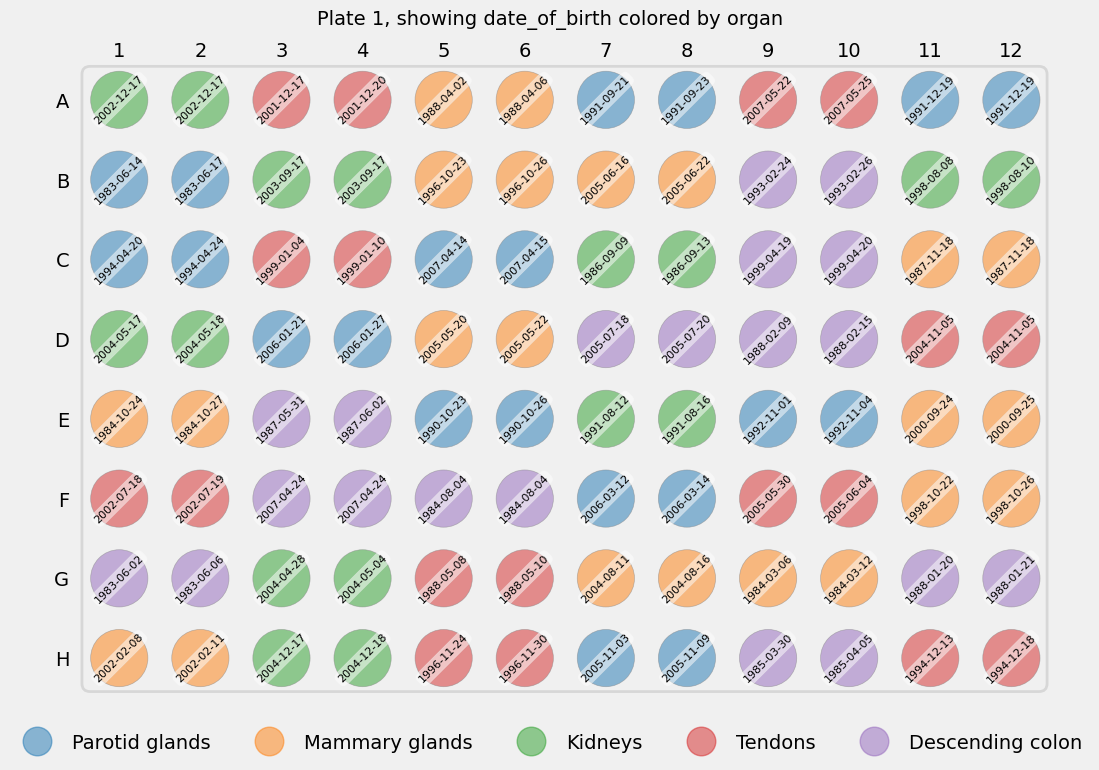

In [100]:
fig = study[0].as_figure(
    color_metadata_key="organ",
    annotation_metadata_key="date_of_birth",
    rotation=45,
    well_size=1700,
    plt_style="fivethirtyeight",
    colormap="tab10",
    alpha=0.5,
    show_grid=False,
    legend_bb=(0.15, -0.1, 0.7, 1.5),
)

In [101]:
study.get_attribute_plate_distributions(attribute="organ")

{1: organ
 Mammary glands      0.229167
 Parotid glands      0.208333
 Descending colon    0.208333
 Tendons             0.187500
 Kidneys             0.166667
 Name: proportion, dtype: float64,
 2: organ
 Mammary glands      0.270833
 Kidneys             0.208333
 Descending colon    0.208333
 Tendons             0.187500
 Parotid glands      0.125000
 Name: proportion, dtype: float64,
 3: organ
 Descending colon    0.270833
 Mammary glands      0.208333
 Tendons             0.208333
 Parotid glands      0.166667
 Kidneys             0.145833
 Name: proportion, dtype: float64,
 4: organ
 Mammary glands      0.291667
 Tendons             0.250000
 Descending colon    0.166667
 Kidneys             0.145833
 Parotid glands      0.145833
 Name: proportion, dtype: float64,
 5: organ
 Parotid glands      0.229167
 Mammary glands      0.208333
 Descending colon    0.208333
 Kidneys             0.187500
 Tendons             0.166667
 Name: proportion, dtype: float64,
 6: organ
 Descending col

In [135]:
def plot_stacked_barchart(attribute, normalize=False, colormap='tab20b'):
    """
    Plots a stacked bar chart from a distributions dictionary.

    :param distributions: Dictionary with plate numbers as keys and Series as values.
    :param normalize: Boolean, if True, normalizes the counts in each category.
    :param colormap: String, name of the matplotlib colormap to use.
    """

    distributions = study.get_attribute_plate_distributions(attribute=attribute, normalize=False)

    # Convert the dictionary to a DataFrame and rename columns
    df = pd.DataFrame(distributions)
    df.columns = [f"plate_{key}" for key in distributions.keys()]

    if normalize:
        # Normalize each column to sum to 100%
        df = df.div(df.sum(axis=1), axis=0) * 100

    # Plotting the stacked bar chart
    fig, ax = plt.subplots()

    # Apply the chosen colormap
    df.plot(kind='bar', stacked=True, ax=ax, colormap=colormap)

    # Set titles and labels
    ax.set_title(f"Counts of {attribute} across plates" + (" (Normalized)" if normalize else ""))
    ax.set_xlabel(f"{attribute}")
    ax.set_ylabel('Proportion (%)' if normalize else 'Counts')

    # Place the legend outside of the plotting area
    ax.legend(title="Plates", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Rotate and align x-axis labels
    plt.xticks(rotation=45, ha='right')

    return fig

# Example usage of the function:
# plot_stacked_barchart(distributions, normalize=False, colormap='tab20')
# This will plot the bar chart with the given distributions, without normalization, using the 'tab20' colormap.



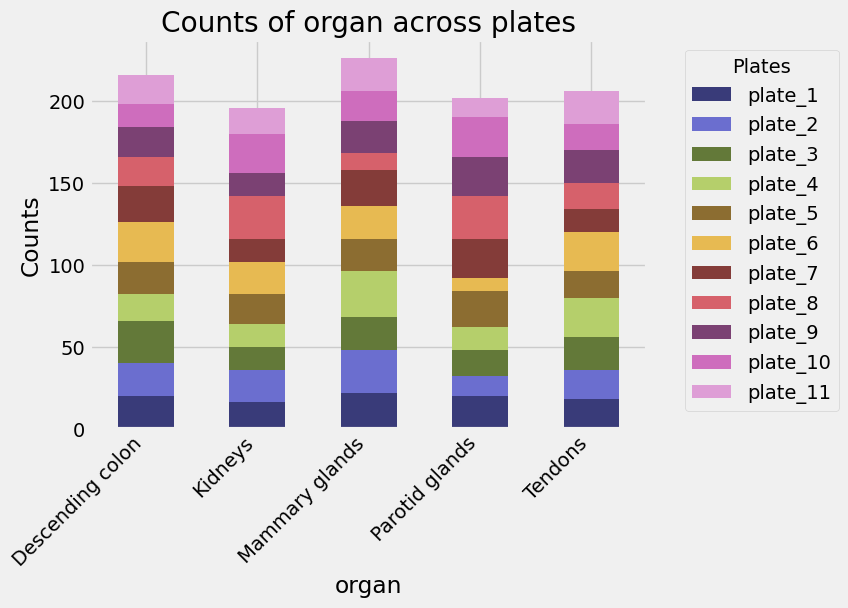

In [136]:
fig = plot_stacked_barchart("organ", normalize=False, colormap="tab20b")

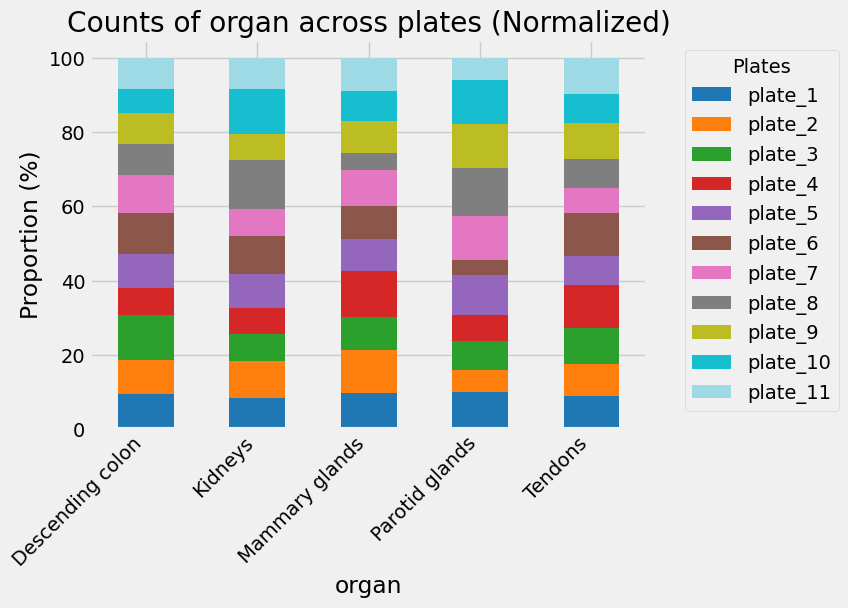

In [137]:
fig = plot_stacked_barchart("organ", normalize=True)

In [132]:

# Assuming 'distributions' is the output from your get_attribute_plate_distributions method
distributions = study.get_attribute_plate_distributions("organ", normalize=False)
distributions

{1: organ
 Mammary glands      22
 Parotid glands      20
 Descending colon    20
 Tendons             18
 Kidneys             16
 Name: count, dtype: int64,
 2: organ
 Mammary glands      26
 Kidneys             20
 Descending colon    20
 Tendons             18
 Parotid glands      12
 Name: count, dtype: int64,
 3: organ
 Descending colon    26
 Mammary glands      20
 Tendons             20
 Parotid glands      16
 Kidneys             14
 Name: count, dtype: int64,
 4: organ
 Mammary glands      28
 Tendons             24
 Descending colon    16
 Kidneys             14
 Parotid glands      14
 Name: count, dtype: int64,
 5: organ
 Parotid glands      22
 Mammary glands      20
 Descending colon    20
 Kidneys             18
 Tendons             16
 Name: count, dtype: int64,
 6: organ
 Descending colon    24
 Tendons             24
 Mammary glands      20
 Kidneys             20
 Parotid glands       8
 Name: count, dtype: int64,
 7: organ
 Parotid glands      24
 Descending colon 

## QC plate

In [48]:
study_with_qc = Study("fake_study")
study_with_qc.load_sample_file(fake_samples_csv_file)

[    INFO] --- Found group index in column pair_ID
[    INFO] --- Metadata in file:
[    INFO] --- 	Unnamed: 0
[    INFO] --- 	pair_ID
[    INFO] --- 	specimen_ID
[    INFO] --- 	object
[    INFO] --- 	date_of_birth
[    INFO] --- 	barcode
[    INFO] --- 	organ


In [49]:
qc_sample_pattern = Path("../../data/plate_config_dynamic.toml")
qc_plate = QCPlate(QC_config=qc_sample_pattern)

study_with_qc.distribute_samples_to_plates(qc_plate)

[    INFO] --- Created a 8x12 plate with 96 wells.
[    INFO] --- Successfully loaded config file ../../data/plate_config_dynamic.toml
[    INFO] --- Creating dynamic plate layout with QC samples.
[    INFO] --- Distributed samples across 14 plates.


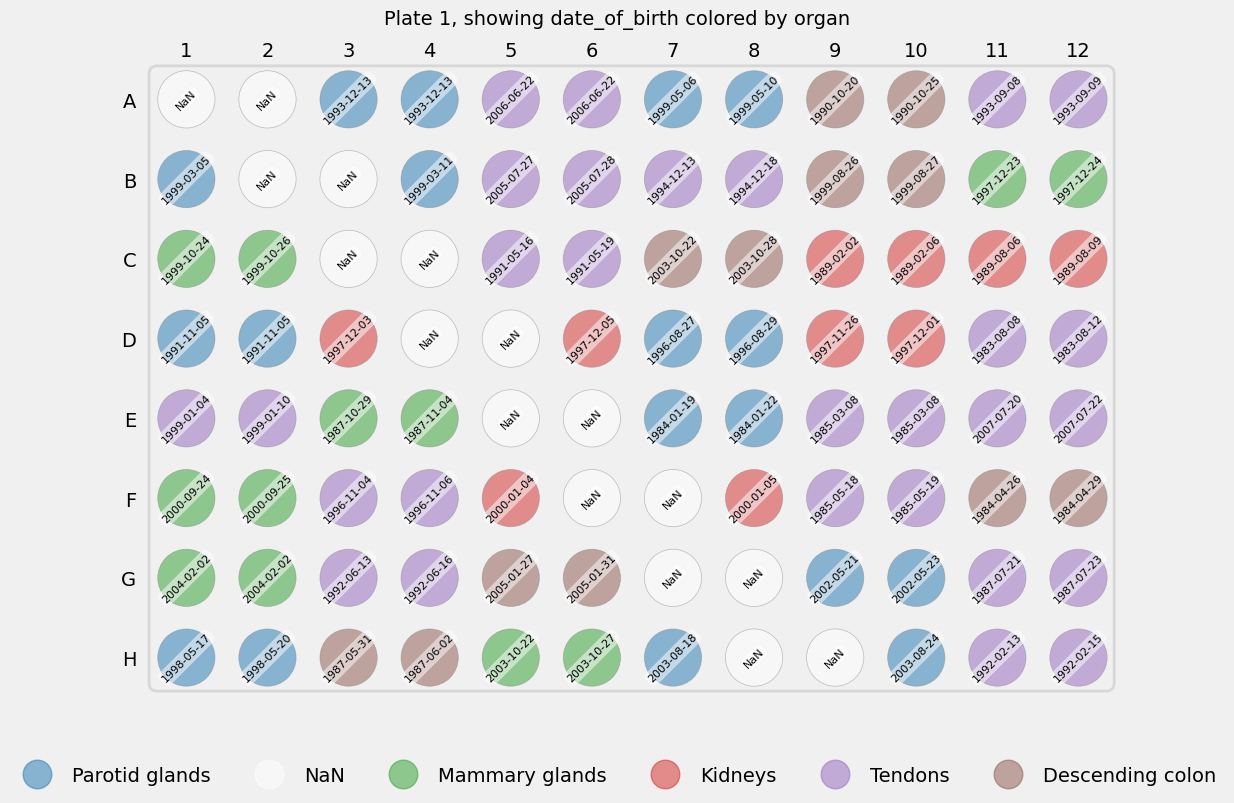

In [50]:
fig = study_with_qc[0].as_figure(
    color_metadata_key="organ",
    annotation_metadata_key="date_of_birth",
    rotation=45, well_size=1700,
    colormap="tab10",
    show_grid=False,
    alpha=0.5
    )